# MACD-V

https://chartschool.stockcharts.com/table-of-contents/technical-indicators-and-overlays/technical-indicators/macd-v

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,49.782501,50.439999,49.327499,50.375000,47.887829,271742800
2018-08-02,50.145000,52.095001,50.087502,51.847500,49.287621,249616000
2018-08-03,51.757500,52.185001,51.369999,51.997501,49.430225,133789600
2018-08-06,52.000000,52.312500,51.767502,52.267502,49.686893,101701600
2018-08-07,52.330002,52.375000,51.689999,51.777500,49.221077,102349600


In [3]:
# Calculate the short-term EMA (12-day)
short_ema = df['Close'].ewm(span=12, adjust=False).mean()

# Calculate the long-term EMA (26-day)
long_ema = df['Close'].ewm(span=26, adjust=False).mean()

# Calculate the ATR (26-day)
df['High-Low'] = df['High'] - df['Low']
df['High-PrevClose'] = abs(df['High'] - df['Close'].shift(1))
df['Low-PrevClose'] = abs(df['Low'] - df['Close'].shift(1))
df['TrueRange'] = df[['High-Low', 'High-PrevClose', 'Low-PrevClose']].max(axis=1)
atr = df['TrueRange'].rolling(window=26).mean()

# Calculate the MACD-V line
df['macd_v'] = ((short_ema - long_ema) / atr) * 100

# Calculate the Signal line (9-day EMA of the MACD-V line)
df['macd_signal_v'] = df['macd_v'].ewm(span=9, adjust=False).mean()

# Calculate the MACD histogram
df['macd_hist_v'] = df['macd_v'] - df['macd_signal_v']


In [4]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,High-Low,High-PrevClose,Low-PrevClose,TrueRange,macd_v,macd_signal_v,macd_hist_v
Date,,,,,,,,,,,,,
2018-09-06,56.557499,56.837502,55.325001,55.775002,53.207165,137160000,1.512501,0.120003,1.392498,1.512501,150.363754,150.363754,0.000000
2018-09-07,55.462502,56.342499,55.177502,55.325001,52.777874,150479200,1.164997,0.567497,0.597500,1.164997,138.126914,147.916386,-9.789473
2018-09-10,55.237499,55.462502,54.117500,54.582500,52.069565,158066000,1.345001,0.137501,1.207500,1.345001,124.106758,143.154461,-19.047703
2018-09-11,54.502499,56.075001,54.139999,55.962502,53.386024,142996000,1.935001,1.492500,0.442501,1.935001,115.528715,137.629312,-22.100596
2018-09-12,56.235001,56.250000,54.959999,55.267502,52.723030,197114800,1.290001,0.287498,1.002502,1.290001,102.715526,130.646554,-27.931028


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,High-Low,High-PrevClose,Low-PrevClose,TrueRange,macd_v,macd_signal_v,macd_hist_v
Date,,,,,,,,,,,,,
2018-12-24,37.037498,37.887501,36.647499,36.707500,35.139694,148676800,1.240002,0.205002,1.035000,1.240002,-179.961511,-155.832844,-24.128667
2018-12-26,37.075001,39.307499,36.680000,39.292500,37.614288,234330000,2.627499,2.599998,0.027500,2.627499,-167.399057,-158.146087,-9.252970
2018-12-27,38.959999,39.192501,37.517502,39.037498,37.370171,212468400,1.674999,0.099998,1.774998,1.774998,-160.176024,-158.552074,-1.623950
2018-12-28,39.375000,39.630001,38.637501,39.057499,37.389332,169165600,0.992500,0.592503,0.399998,0.992500,-158.476250,-158.536909,0.060659
2018-12-31,39.632500,39.840000,39.119999,39.435001,37.750702,140014000,0.720001,0.782501,0.062500,0.782501,-156.940612,-158.217650,1.277038


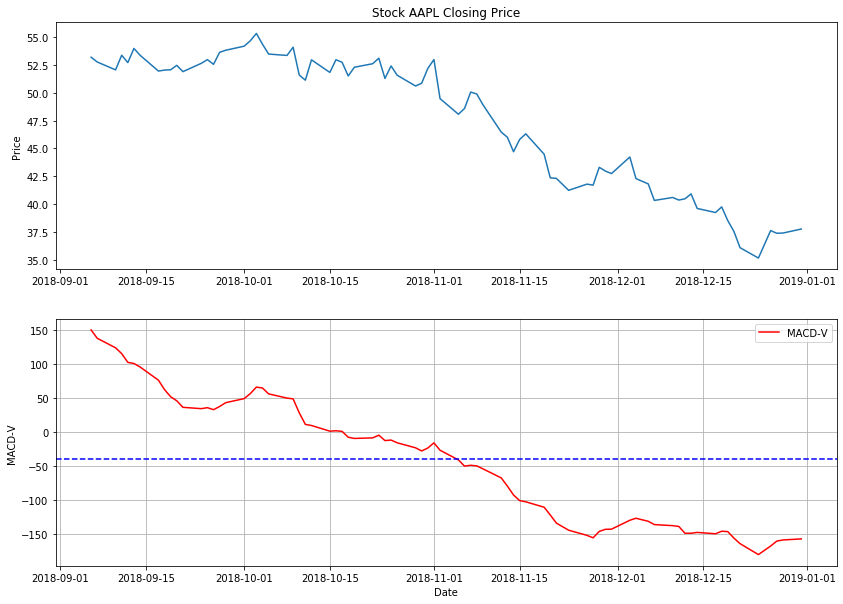

In [9]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['macd_v'], label='MACD-V', color='red')
ax2.axhline(df['macd_v'].mean(), color='blue', linestyle='--')
ax2.grid()
ax2.set_ylabel('MACD-V')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

### Candlestick with MACD-V

In [14]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)

# Prepare the data for the candlestick chart
ohlc = dfc[['Date', 'Open', 'High', 'Low', 'Adj Close']].copy()
ohlc.columns = ['Date', 'Open', 'High', 'Low', 'Close']

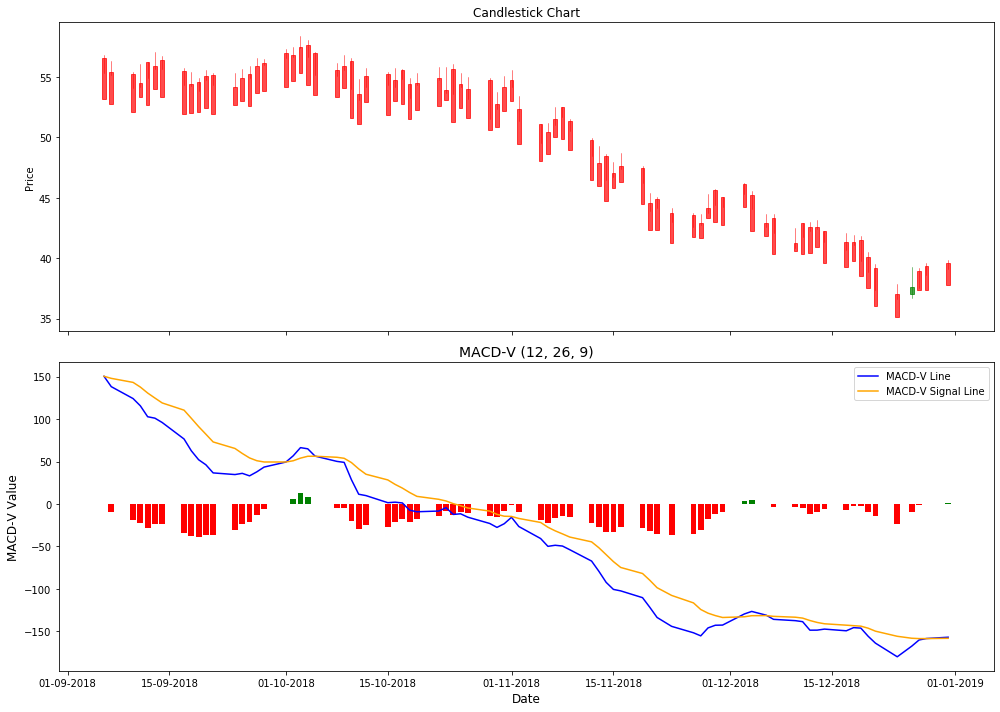

In [16]:
from mplfinance.original_flavor import candlestick_ohlc

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

# Plot candlestick chart
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
candlestick_ohlc(ax1, ohlc.values, width=0.5, colorup='g', colordown='r', alpha=0.7)
ax1.set_title('Candlestick Chart')
ax1.set_ylabel('Price')

# Subplot for the MACD-V line, signal line, and MACD histogram
ax2.set_title('MACD-V (12, 26, 9)', fontsize=14)
ax2.set_ylabel('MACD-V Value', fontsize=12)
ax2.plot(dfc['Date'], df['macd_v'], label='MACD-V Line', color='blue')
ax2.plot(dfc['Date'], df['macd_signal_v'], label='MACD-V Signal Line', color='orange')

# Set color of the MACD histogram
macd_hist_color = ['green' if x > 0 else 'red' for x in df['macd_hist_v']]

# Plot MACD histogram
ax2.bar(dfc['Date'], df['macd_hist_v'], color=macd_hist_color)
ax2.legend()

# Set the xlabel for the shared axis
ax2.set_xlabel('Date', fontsize=12)

plt.tight_layout()
plt.show()